In [25]:
# LIBRARY PART
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid")

In [ ]:

# LOADING DATA
mental_file= r"C:\Users\samim\OneDrive\Masaüstü\Mental health Depression disorder Data.xlsx"
digital_file= r"C:\Users\samim\OneDrive\Masaüstü\daily-hours-spent-with-digital-media-per-adult-user.csv"

mental_raw= pd.read_excel(mental_file)
digital_raw= pd.read_csv(digital_file)

# CHANGING DATA TO NUMERIC
mental_raw["Year"]= pd.to_numeric(mental_raw["Year"], errors="coerce")
digital_raw["Year"]= pd.to_numeric(digital_raw["Year"], errors="coerce")

In [ ]:

# FILTERING COUNTRY AND YEARS (USA, 2008-2018)
mental_usa =mental_raw[
    (mental_raw["Entity"]== "United States") &
    (mental_raw["Year"].between(2008, 2018))].copy()

digital_usa = digital_raw[
    (digital_raw["Entity"]== "United States") &
    (digital_raw["Year"].between(2008, 2018))].copy()



In [ ]:
# SELECTING THE MENTAL DISORDERS AND YEAR
mental_cols =[
    "Year",
    "Schizophrenia (%)",
    "Bipolar disorder (%)",
    "Anxiety disorders (%)",
    "Depression (%)"]

mental_usa = mental_usa[mental_cols]

# DROPPING MISSING VALUES
mental_usa = mental_usa.dropna(subset=mental_cols[1:], how="all")

# TAKING MEANS OF EACH YEAR
mental_usa= mental_usa.groupby("Year", as_index=False).mean()


In [ ]:
# TOTAL DIGITAL MEDIA USAGE
digital_usa["total_digital_hours"] = (
    digital_usa["Mobile (BOND Internet Trends (2019))"] +
    digital_usa["Desktop/Laptop (BOND Internet Trends (2019))"] +
    digital_usa["Other Connected Devices (BOND Internet Trends (2019))"])

digital_usa= digital_usa[["Year","total_digital_hours"]]

In [ ]:
# MERGING YEAR AND MEDIA USAGE DATA
df = pd.merge(digital_usa, mental_usa, on="Year", how="inner")

print(df)

   Year  total_digital_hours Schizophrenia (%) Bipolar disorder (%)  \
0  2008                  2.7    3563356.170673          1447.660977   
1  2009                  2.9    3587033.836208            1444.7057   
2  2010                  3.2    3615291.261042          1443.612164   
3  2011                  3.7    3647703.028457          1444.138727   
4  2012                  4.4    3679690.262391          1445.427519   
5  2013                  4.9    3713664.205283          1447.879654   
6  2014                  5.1    3750040.828813          1451.238769   
7  2015                  5.4    3788786.823445          1455.829269   
8  2016                  5.7    3830424.713495          1461.474895   
9  2017                  6.0      3874844.0599          1468.759126   

   Anxiety disorders (%)  Depression (%)  
0               6.801899        4.776402  
1               6.737790        4.765950  
2               6.704455        4.761551  
3               6.693384        4.762322  
4  

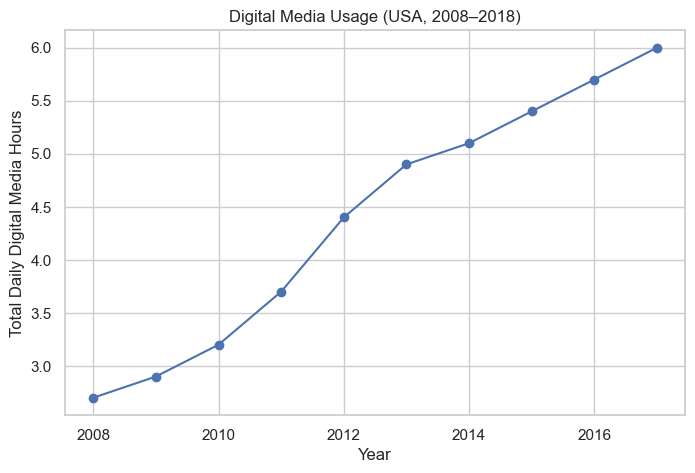

In [36]:
# VISUALIZATION OF MEDIA USAGE DATA
plt.figure(figsize=(8,5))
plt.plot(df["Year"], df["total_digital_hours"], marker="o")
plt.xlabel("Year")
plt.ylabel("Total Daily Digital Media Hours")
plt.title("Digital Media Usage (USA, 2008–2018)")
plt.show()


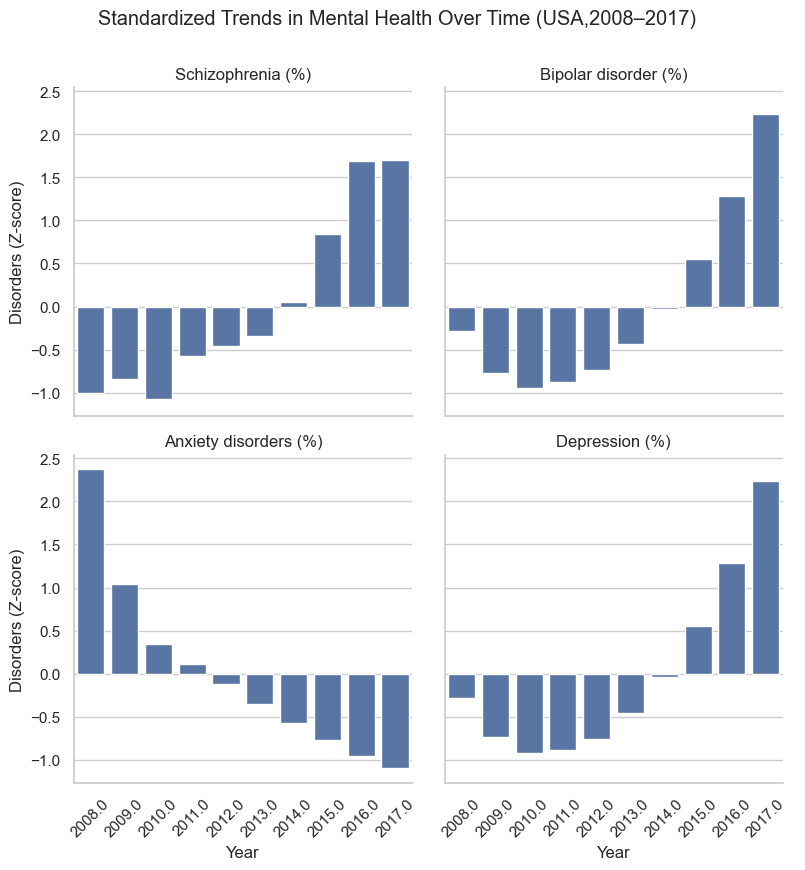

In [35]:
# VISUALIZATION OF MENTAL HEALTH DATA
# SELECTING MENTAL DISORDERS
disorder_cols = [
    "Schizophrenia (%)",
    "Bipolar disorder (%)",
    "Anxiety disorders (%)",
    "Depression (%)"]

mental_norm = mental_usa.copy()

# Z-SCORE NORMALIZATION
scaler = StandardScaler()

mental_norm[disorder_cols] = scaler.fit_transform(
    mental_norm[disorder_cols])

# ALTERING THE FORMAT
mental_long_norm= mental_norm.melt(
    id_vars="Year",
    value_vars=disorder_cols,
    var_name="Disorder",
    value_name="Disorders (Z-score)")

# BARPLOT
g = sns.catplot(
    data=mental_long_norm,
    x="Year",
    y="Disorders (Z-score)",
    col="Disorder",
    kind="bar",
    col_wrap=2,
    sharey=True,
    height=4)

g.set_titles("{col_name}")
g.set_axis_labels("Year","Disorders (Z-score)")

for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.suptitle(
    "Standardized Trends in Mental Health Over Time (USA,2008–2017)",
    y=1.05)

plt.show()


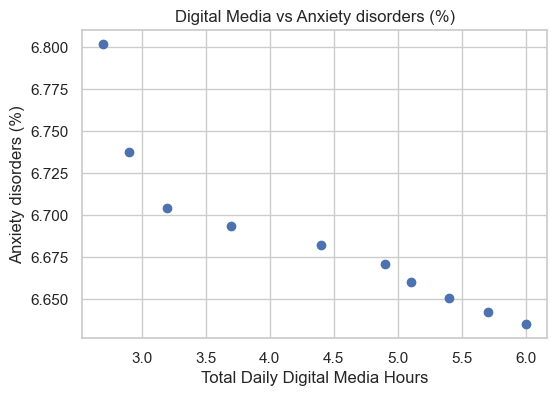

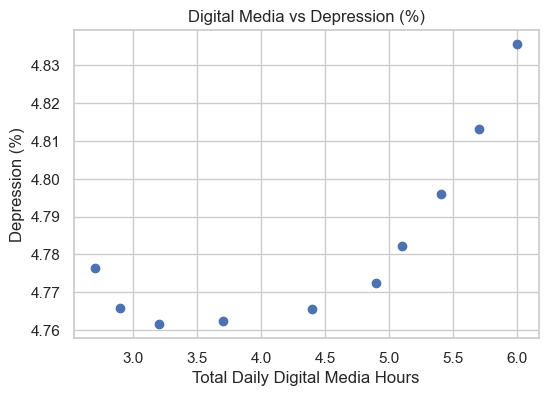

In [34]:
# SCATTER PLOTS
for disorder in mental_long["Disorder"].unique():
    subset = df[["total_digital_hours", disorder]].dropna()
    
    plt.figure(figsize=(6, 4))
    plt.scatter(
        subset["total_digital_hours"],
        subset[disorder])
    
    plt.xlabel("Total Daily Digital Media Hours")
    plt.ylabel(disorder)
    plt.title(f"Digital Media vs {disorder}")
    plt.show()


In [33]:
# SPEARMAN CORRELATION
alpha = 0.05

for disorder in [
    "Schizophrenia (%)",
    "Bipolar disorder (%)",
    "Anxiety disorders (%)",
    "Depression (%)"]:
    
    subset = df[["total_digital_hours", disorder]].dropna()
    
    if len(subset) < 3:
        print(f"{disorder}: Not enough data for correlation\n")
        continue

    rho, p = spearmanr(
        subset["total_digital_hours"],
        subset[disorder]
    )

    print(f"Spearman Correlation — {disorder}")
    print("--------------------------------")
    print(f"ρ (rho): {rho:.4f}")
    print(f"P-value: {p:.4f}")

    if p < alpha:
        print("Result: Reject H0 (statistically significant)\n")
    else:
        print("Result: Fail to reject H0 (not significant)\n")


Spearman Correlation — Schizophrenia (%)
--------------------------------
ρ (rho): 1.0000
P-value: 0.0000
Result: Reject H0 (statistically significant)

Spearman Correlation — Bipolar disorder (%)
--------------------------------
ρ (rho): 0.8424
P-value: 0.0022
Result: Reject H0 (statistically significant)

Spearman Correlation — Anxiety disorders (%)
--------------------------------
ρ (rho): -1.0000
P-value: 0.0000
Result: Reject H0 (statistically significant)

Spearman Correlation — Depression (%)
--------------------------------
ρ (rho): 0.7455
P-value: 0.0133
Result: Reject H0 (statistically significant)



In [32]:
# UPDATING THE LAST VERSION OF DATA
df.to_csv("clean_usa_mental_digital_data.csv", index=False)